In this project, we are going to make a email classification model which classify the email as spam and non-spam email by analysing the subject as well as content of the mails

In [1]:
import os
import email
import random
import email.policy
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# HTML to List

spam_emails = os.listdir(r"C:\Users\achyu\Desktop\DataMining\DM_Project\hamnspam\spam")
ham_emails = os.listdir(r"C:\Users\achyu\Desktop\DataMining\DM_Project\hamnspam\ham")

def load_email_spam(filename):
    with open(os.path.join(r"C:\Users\achyu\Desktop\DataMining\DM_Project\hamnspam\spam", filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

def load_email_ham(filename):
    with open(os.path.join(r"C:\Users\achyu\Desktop\DataMining\DM_Project\hamnspam\ham", filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
spam_emails = [load_email_spam(filename) for filename in spam_emails]
ham_emails = [load_email_ham(filename) for filename in ham_emails]

In [3]:
# List to Data_Frame

def process_email(emails, label, data_dictionary, default_topic=None):
    for mail in emails:
        payload = mail.get_payload()
        if isinstance(payload, list):
            process_email(payload, label, data_dictionary, default_topic=mail["Subject"])
        else:
            if "Content-Type" in mail.keys():
                if "html" in mail["Content-Type"].lower():
                    try: 
                        soup = BeautifulSoup(mail.get_content())
                        topic = mail["Subject"]
                        if topic == None:
                            topic = default_topic
                        content = soup.body.text
                        data_dictionary["subject"].append(topic)
                        data_dictionary["content"].append(content)
                        data_dictionary["label"].append(label)                
                    except:
                        pass
                elif "plain" in mail["Content-Type"].lower():
                    try: 
                        topic = mail["Subject"]
                        if topic == None:
                            topic = default_topic
                        content = mail.get_content()
                        data_dictionary["subject"].append(topic)
                        data_dictionary["content"].append(content)
                        data_dictionary["label"].append(label)
                    except:
                        pass
                else:
                    pass

# define disctionary stucture
emails_dictionary = {"subject": [], "content": [], "label": []}
# Get Email Contents
process_email(spam_emails, 1, emails_dictionary)
process_email(ham_emails, 0, emails_dictionary)
# Convert Dictionaryt o DataFrame
emails_df = pd.DataFrame(emails_dictionary)
emails_df.head()

,subject,content,label
0,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
1,Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,Re: Fw: User Name & Password to Membership To ...,##############################################...,1
3,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,I thought you might like these:\n1) Slim Down ...,1
4,"FORTUNE 500 COMPANY HIRING, AT HOME REPS.",Help wanted. We are a 14 year old fortune 500...,1


# Data Cleaning

In [4]:
emails_df.shape

(2407, 3)

In [5]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2404 non-null   object
 1   content  2407 non-null   object
 2   label    2407 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 56.5+ KB


In [6]:
# check for missing values

emails_df.isnull().sum()

subject    3
content    0
label      0
dtype: int64

In [7]:
# Drop rows having any missing values

emails_df.dropna(inplace=True)

In [8]:
# check for duplicate values

emails_df.duplicated().sum()

131

In [9]:
# remove rows having duplicates except itself

emails_df = emails_df.drop_duplicates(keep='first')

In [10]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 0 to 2406
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2273 non-null   object
 1   content  2273 non-null   object
 2   label    2273 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 71.0+ KB


# EDA

In [11]:
emails_df['label'].value_counts()

0    2036
1     237
Name: label, dtype: int64

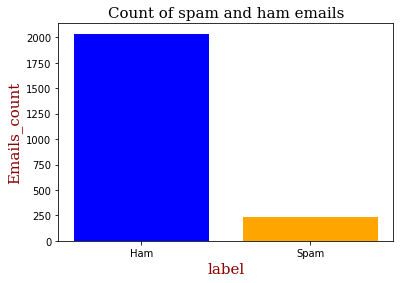

In [12]:
# Bar Plot

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Ham', 'Spam']
plt.bar(labels, emails_df['label'].value_counts(), color=['blue', 'orange'])

font1 = {'family':'serif','color':'black','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("label", fontdict = font2)
plt.ylabel("Emails_count", fontdict = font2)
plt.title("Count of spam and ham emails", fontdict = font1)

plt.show()

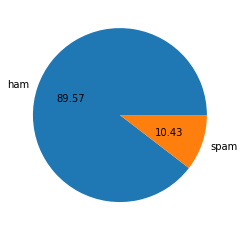

In [13]:
# Pie Chart

plt.pie(emails_df['label'].value_counts(), labels=['ham','spam'],autopct='%.2f')

plt.show()

Thus, the given data is imbalance.

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now, for deeper analysis we made three new column named as num_character, num_words and num_sentences for both subject and content feature

In [15]:
# to gives number of character in each row for both features
emails_df['num_characters_subject'] = emails_df['subject'].apply(len)
emails_df['num_characters_content'] = emails_df['content'].apply(len)

# to gives number of words in each row for both features
emails_df['num_words_subject'] = emails_df['subject'].apply(lambda x:len(nltk.word_tokenize(x)))
emails_df['num_words_content'] = emails_df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

# to gives number of sentences in each row for both features
emails_df['num_sentences_subject'] = emails_df['subject'].apply(lambda x:len(nltk.sent_tokenize(x)))
emails_df['num_sentences_content'] = emails_df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

emails_df.head()

,subject,content,label,num_characters_subject,num_characters_content,num_words_subject,num_words_content,num_sentences_subject,num_sentences_content
0,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,53,781,12,145,1,5
1,Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,71,625,9,119,1,4
2,Re: Fw: User Name & Password to Membership To ...,##############################################...,1,76,2904,17,705,1,44
3,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,I thought you might like these:\n1) Slim Down ...,1,64,659,14,110,1,4
4,"FORTUNE 500 COMPANY HIRING, AT HOME REPS.",Help wanted. We are a 14 year old fortune 500...,1,41,692,9,126,1,9


In [16]:
# Description of all numerical features

emails_df[['num_characters_subject', 'num_characters_content', 'num_words_subject','num_words_content', 'num_sentences_subject', 'num_sentences_content']].describe()

,num_characters_subject,num_characters_content,num_words_subject,num_words_content,num_sentences_subject,num_sentences_content
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,36.602728,1489.543335,7.831940,290.873735,1.062473,11.969644
std,18.487270,3525.838305,4.121814,667.206301,0.277635,26.460265
min,2.000000,57.000000,1.000000,3.000000,1.000000,1.000000
25%,24.000000,437.000000,5.000000,82.000000,1.000000,4.000000
50%,34.000000,858.000000,7.000000,170.000000,1.000000,7.000000
75%,46.000000,1520.000000,10.000000,305.000000,1.000000,12.000000
max,150.000000,88024.000000,30.000000,16489.000000,5.000000,573.000000


In [17]:
# ham description

emails_df[emails_df['label'] == 0][['num_characters_subject', 'num_characters_content', 'num_words_subject','num_words_content', 'num_sentences_subject', 'num_sentences_content']].describe()

,num_characters_subject,num_characters_content,num_words_subject,num_words_content,num_sentences_subject,num_sentences_content
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,36.431729,1386.703831,7.881139,271.366405,1.052063,10.851179
std,18.634167,3533.974301,4.178172,661.177717,0.257068,25.424919
min,2.000000,57.000000,1.000000,3.000000,1.000000,1.000000
25%,23.000000,397.500000,5.000000,75.000000,1.000000,3.000000
50%,34.000000,810.000000,7.000000,159.000000,1.000000,7.000000
75%,46.000000,1448.000000,11.000000,287.250000,1.000000,11.000000
max,150.000000,88024.000000,30.000000,16489.000000,5.000000,573.000000


In [18]:
# spam description

emails_df[emails_df['label'] == 1][['num_characters_subject', 'num_characters_content', 'num_words_subject','num_words_content', 'num_sentences_subject', 'num_sentences_content']].describe()

,num_characters_subject,num_characters_content,num_words_subject,num_words_content,num_sentences_subject,num_sentences_content
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,38.071730,2373.008439,7.409283,458.455696,1.151899,21.578059
std,17.140222,3333.746771,3.581556,696.146033,0.404066,32.600939
min,7.000000,64.000000,1.000000,11.000000,1.000000,1.000000
25%,27.000000,760.000000,5.000000,145.000000,1.000000,8.000000
50%,36.000000,1316.000000,7.000000,233.000000,1.000000,12.000000
75%,48.000000,2715.000000,9.000000,492.000000,1.000000,21.000000
max,84.000000,23855.000000,21.000000,5348.000000,3.000000,252.000000


From the above description of ham and spam emails, we can see that per spam emails the number of character, number of words and number of sentences in 'content' are more than the same in case of ham emails.

Also, we can see that per spam emails the number of character, number of words and number of sentences in 'subject' are almost same as that of ham emails.

So, by just looking the number of character, number fo words and number of sentences of 'subject' of the emails, we can't say which one is spam or ham.

And the same things can be visualise using plot also.

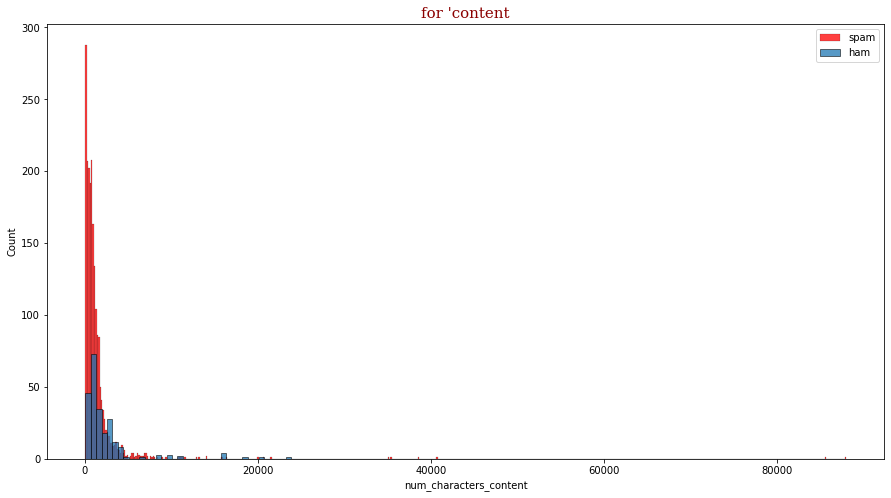

In [19]:
plt.figure(figsize=(15,8))

sns.histplot(emails_df[emails_df['label'] == 0]['num_characters_content'],color='red')
sns.histplot(emails_df[emails_df['label'] == 1]['num_characters_content'])
plt.title("for 'content", fontdict = font2)
plt.legend(['spam','ham'])

plt.show()

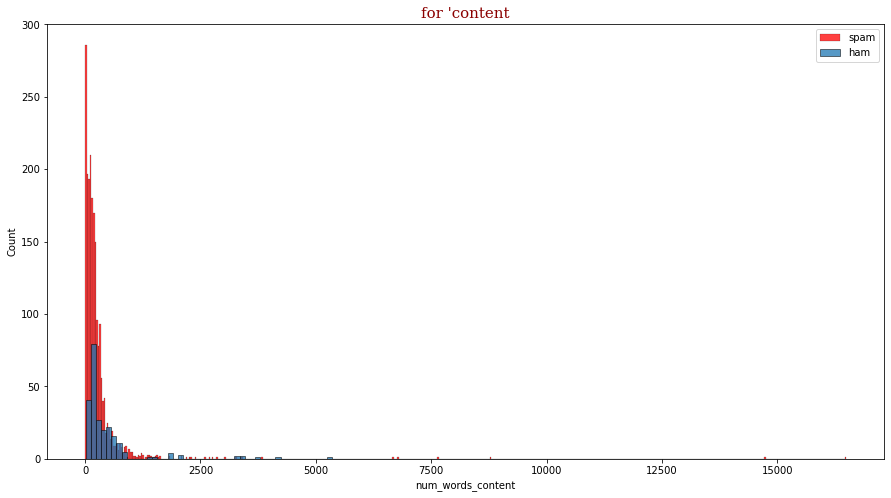

In [20]:
plt.figure(figsize=(15,8))

sns.histplot(emails_df[emails_df['label'] == 0]['num_words_content'],color='red')
sns.histplot(emails_df[emails_df['label'] == 1]['num_words_content'])
plt.title("for 'content", fontdict = font2)
plt.legend(['spam','ham'])

plt.show()

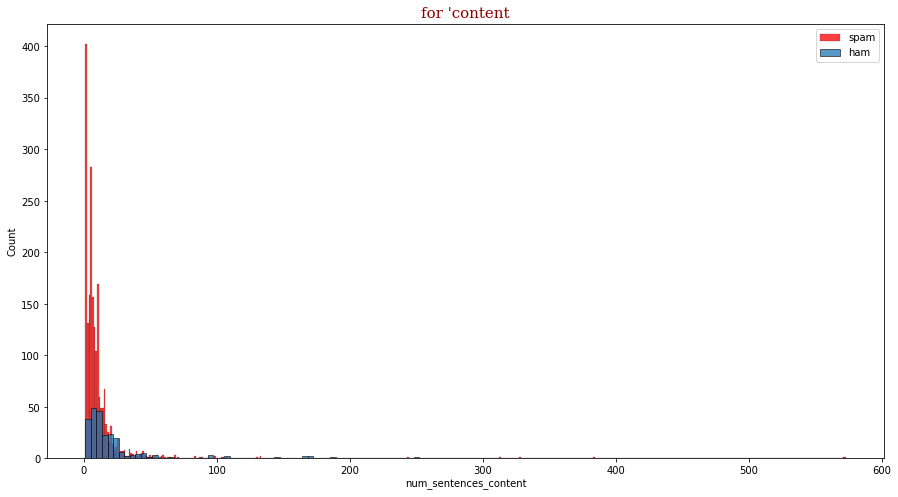

In [21]:
plt.figure(figsize=(15,8))

sns.histplot(emails_df[emails_df['label'] == 0]['num_sentences_content'],color='red')
sns.histplot(emails_df[emails_df['label'] == 1]['num_sentences_content'])
plt.title("for 'content", fontdict = font2)
plt.legend(['spam','ham'])

plt.show()

<Figure size 1080x576 with 0 Axes>

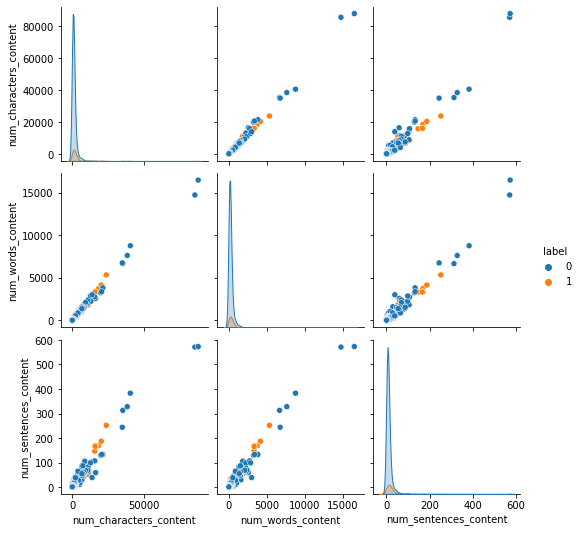

In [22]:
plt.figure(figsize=(15,8))

sns.pairplot(emails_df, x_vars=['num_characters_content', 'num_words_content', 'num_sentences_content'],
             y_vars=['num_characters_content', 'num_words_content', 'num_sentences_content'], hue='label')

plt.show()

<Figure size 1080x576 with 0 Axes>

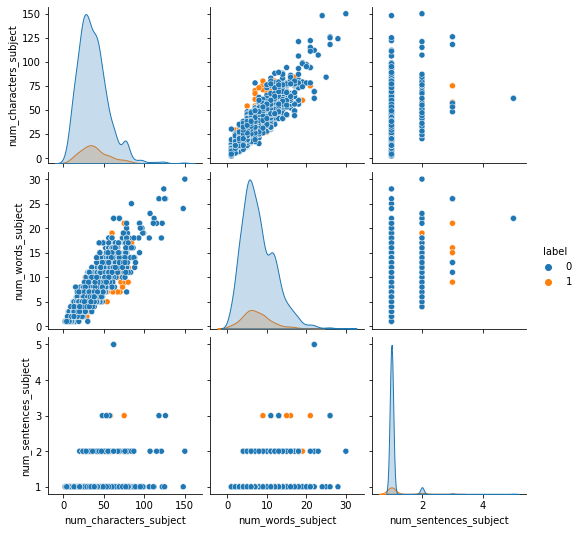

In [23]:
plt.figure(figsize=(15,8))

sns.pairplot(emails_df, x_vars=['num_characters_subject', 'num_words_subject', 'num_sentences_subject'],
             y_vars=['num_characters_subject', 'num_words_subject', 'num_sentences_subject'], hue='label')

plt.show()

<AxesSubplot:>

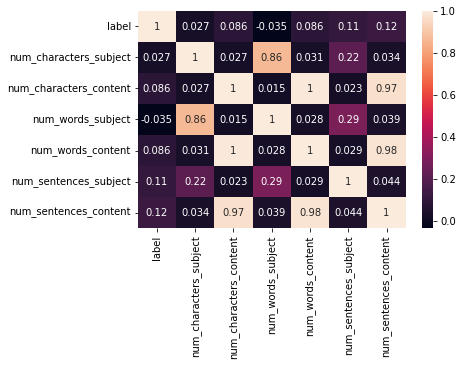

In [24]:
sns.heatmap(emails_df.corr(),annot=True)

# Data Preprocessing

* Lower case

* Tokenization

* Removing special characters

* Removing stop words and punctuation

* Stemming

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
def transform_text(text):
    text = text.lower()               # Lower case
    text = nltk.word_tokenize(text)   # Tokenization
    
    y = []
    for i in text:
        if i.isalnum():               # Removing special characters (alpha numeric)
            y.append(i)
    
    text = y[:]                 # we can't do text = y, since list is mutable data type, so after clearing y, text also get cleared. So we clone y in text using text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:           # Removing stop words and punctuation
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))               # Stemming
    
            
    return " ".join(y)           # " ".join(y) return in the form of string otherwise y return in the form of list

In [29]:
# transformation

emails_df['transformed_subject'] = emails_df['subject'].apply(transform_text)
emails_df['transformed_content'] = emails_df['content'].apply(transform_text)

In [30]:
emails_df.head()

,subject,content,label,num_characters_subject,num_characters_content,num_words_subject,num_words_content,num_sentences_subject,num_sentences_content,transformed_subject,transformed_content
0,[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,53,781,12,145,1,5,ilug guarante lose lb 30 day,1 fight risk cancer http 2 slim guarante lose ...
1,Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,71,625,9,119,1,4,guarante lose lb 30 day,1 fight risk cancer http 2 slim guarante lose ...
2,Re: Fw: User Name & Password to Membership To ...,##############################################...,1,76,2904,17,705,1,44,fw user name password membership 5 site zzzz p...,adult club offer free membership instant acces...
3,[ILUG-Social] re: Guaranteed to lose 10-12 lbs...,I thought you might like these:\n1) Slim Down ...,1,64,659,14,110,1,4,guarante lose lb 30 day,thought might like 1 slim guarante lose lb 30 ...
4,"FORTUNE 500 COMPANY HIRING, AT HOME REPS.",Help wanted. We are a 14 year old fortune 500...,1,41,692,9,126,1,9,fortun 500 compani hire home rep,help want 14 year old fortun 500 compani grow ...


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

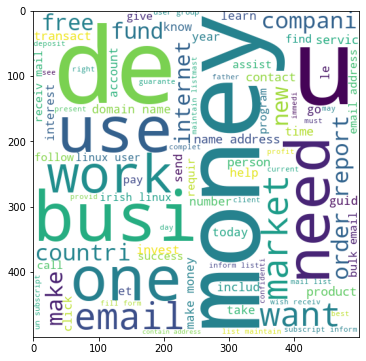

In [32]:
# to see most common word appear in 'content' of spam mail

spam_wc_c = wc.generate(emails_df[emails_df['label'] == 1]['transformed_content'].str.cat(sep=" "))  # str.cat(sep=" ") use to concat the words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc_c)

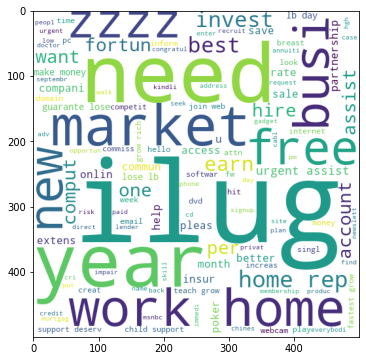

In [33]:
# to see most common word appear in 'subject' of spam mail

spam_wc_s = wc.generate(emails_df[emails_df['label'] == 1]['transformed_subject'].str.cat(sep=" "))  # str.cat(sep=" ") use to concat the words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc_s)

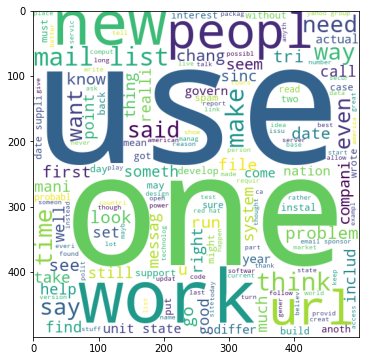

In [34]:
# to see most common word appear in 'content' of ham mail

ham_wc_c = wc.generate(emails_df[emails_df['label'] == 0]['transformed_content'].str.cat(sep=" "))  # str.cat(sep=" ") use to concat the words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc_c)

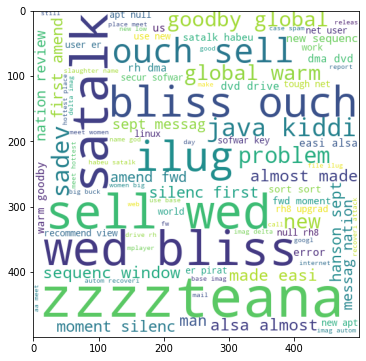

In [35]:
# to see most common word appear in 'subject' of ham mail

ham_wc_s = wc.generate(emails_df[emails_df['label'] == 0]['transformed_subject'].str.cat(sep=" "))  # str.cat(sep=" ") use to concat the words

plt.figure(figsize=(15,6))
plt.imshow(spam_wc_s)

# Feature Engineering

* Vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [37]:
x_c = cv.fit_transform(emails_df['transformed_content']).toarray()
x_s = cv.fit_transform(emails_df['transformed_subject']).toarray()

In [38]:
x_c

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
x_c.shape

(2273, 17721)

2273 - # of rows, 17721 - # of unique words in 'content' of emails

In [40]:
x_s

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
x_s.shape

(2273, 2736)

2273 -# of rows, 2736 -# of unique words in 'subject' of emails

In [42]:
y = emails_df['label'].values

In [43]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Model Building

## * For Content

In [44]:
from sklearn.model_selection import train_test_split

x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(x_c,y,test_size=0.2,random_state=2)

#### SMOTE (Synthetic Minority Oversampling Technique)

In [45]:
pd.DataFrame(y_train_c).value_counts()

0    1626
1     192
dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_train_c_sm, y_train_c_sm = smote.fit_resample(x_train_c,y_train_c)

In [47]:
pd.DataFrame(y_train_c_sm).value_counts()

0    1626
1    1626
dtype: int64

### 1 NaiveByes

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(x_train_c_sm,y_train_c_sm)
y_pred_gnb = gnb.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_gnb))
print(classification_report(y_test_c, y_pred_gnb))

[[399  11]
 [ 15  30]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       410
           1       0.73      0.67      0.70        45

    accuracy                           0.94       455
   macro avg       0.85      0.82      0.83       455
weighted avg       0.94      0.94      0.94       455



In [52]:
mnb.fit(x_train_c_sm,y_train_c_sm)
y_pred_mnb = mnb.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_mnb))
print(classification_report(y_test_c, y_pred_mnb))

[[410   0]
 [  3  42]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       410
           1       1.00      0.93      0.97        45

    accuracy                           0.99       455
   macro avg       1.00      0.97      0.98       455
weighted avg       0.99      0.99      0.99       455



In [53]:
bnb.fit(x_train_c_sm,y_train_c_sm)
y_pred_bnb = bnb.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_bnb))
print(classification_report(y_test_c, y_pred_bnb))

[[338  72]
 [  5  40]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       410
           1       0.36      0.89      0.51        45

    accuracy                           0.83       455
   macro avg       0.67      0.86      0.70       455
weighted avg       0.92      0.83      0.86       455



Observation :- We can see that the f1 score for MoltinomialNB is Maximum among all NB, So we use MoltinomialNB for Cross_Validation

#### Cross Validation

In [54]:
from sklearn.model_selection import GridSearchCV

NB_grid = GridSearchCV(estimator = mnb,
                       param_grid = {},
                       cv = 10, 
                       n_jobs = -1)

NB_grid.fit(x_train_c_sm,y_train_c_sm)

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1, param_grid={})

In [55]:
y_pred_mnb_grid = NB_grid.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_mnb_grid))
print(classification_report(y_test_c, y_pred_mnb_grid))

[[410   0]
 [  3  42]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       410
           1       1.00      0.93      0.97        45

    accuracy                           0.99       455
   macro avg       1.00      0.97      0.98       455
weighted avg       0.99      0.99      0.99       455



#### Prediction (Implementation)

In [56]:


# def predict_output():
#     x = input("Enter the content of the mail : ")
#     x_transformed = [transform_text(x)]
#     x_vectorizer = cv.fit_transform(x_transformed).toarray()
      
#     if mnb.predict(x_vectorizer)[0] == 0:                  
#         return "The given Email is Ham"
#     else:
#         return "The given Email is Spam"
    
# predict_output()

### 2 LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lrc = LogisticRegression()

In [59]:
random_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'solver' : ['sag', 'saga'],
              'max_iter' : [75, 100, 125],
              'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]
             }

print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['sag', 'saga'], 'max_iter': [75, 100, 125], 'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]}


In [60]:
from sklearn.model_selection import RandomizedSearchCV

LRC_randomcv = RandomizedSearchCV(estimator = lrc, 
                       param_distributions = random_grid, 
                       cv = 3,
                       n_iter=100,
                       verbose=2,
                       n_jobs = -1)

LRC_randomcv.fit(x_train_c_sm,y_train_c_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8],
                                        'max_iter': [75, 100, 125],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['sag', 'saga']},
                   verbose=2)

In [61]:
LRC_randomcv.best_params_

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 125, 'l1_ratio': 0.4}

In [62]:
best_estimator_LRC=LRC_randomcv.best_estimator_    
best_estimator_LRC

LogisticRegression(l1_ratio=0.4, max_iter=125, solver='sag')

In [63]:
y_pred_LRC = best_estimator_LRC.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_LRC))
print(classification_report(y_test_c, y_pred_LRC))

[[408   2]
 [  7  38]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       410
           1       0.95      0.84      0.89        45

    accuracy                           0.98       455
   macro avg       0.97      0.92      0.94       455
weighted avg       0.98      0.98      0.98       455



### 3 SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()

In [66]:
import numpy as np

random_grid = {'C' : [x for x in np.arange(1.0, 20.0, 0.5)],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree' : [2, 3, 4, 5],
             }

print(random_grid)

{'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4, 5]}


In [67]:
SVC_randomcv = RandomizedSearchCV(estimator = svc, 
                       param_distributions = random_grid, 
                       cv = 3,
                       n_iter=100,
                       verbose=2,
                       n_jobs = -1)

SVC_randomcv.fit(x_train_c_sm,y_train_c_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,
                                              4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5,
                                              8.0, 8.5, 9.0, 9.5, 10.0, 10.5,
                                              11.0, 11.5, 12.0, 12.5, 13.0,
                                              13.5, 14.0, 14.5, 15.0, 15.5, ...],
                                        'degree': [2, 3, 4, 5],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=2)

In [68]:
SVC_randomcv.best_params_

{'kernel': 'rbf', 'degree': 5, 'C': 15.5}

In [69]:
best_estimator_SVC=SVC_randomcv.best_estimator_    
best_estimator_SVC

SVC(C=15.5, degree=5)

In [70]:
y_pred_SVC = best_estimator_SVC.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_SVC))
print(classification_report(y_test_c, y_pred_SVC))

[[397  13]
 [  9  36]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       410
           1       0.73      0.80      0.77        45

    accuracy                           0.95       455
   macro avg       0.86      0.88      0.87       455
weighted avg       0.95      0.95      0.95       455



### 4 KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
random_grid = {'n_neighbors' : [x for x in range(3, 15)],
               'weights' : ['uniform', 'distance'],
             }

print(random_grid)

{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance']}


In [74]:
KNN_randomcv = RandomizedSearchCV(estimator = knn, 
                       param_distributions = random_grid, 
                       cv = 3,
                       n_iter=100,
                       verbose=2,
                       n_jobs = -1)

KNN_randomcv.fit(x_train_c_sm,y_train_c_sm)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11, 12, 13, 14],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [75]:
KNN_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 3}

In [76]:
best_estimator_KNN=KNN_randomcv.best_estimator_    
best_estimator_KNN

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [77]:
y_pred_KNN = best_estimator_KNN.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_KNN))
print(classification_report(y_test_c, y_pred_KNN))

[[311  99]
 [  2  43]]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       410
           1       0.30      0.96      0.46        45

    accuracy                           0.78       455
   macro avg       0.65      0.86      0.66       455
weighted avg       0.93      0.78      0.82       455



### 5 DT

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt=DecisionTreeClassifier()

In [81]:
random_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
               'splitter' : ['best', 'random'],
               'max_depth' : [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split' : [2, 5, 10,14],
               'min_samples_leaf' : [1, 2, 4,6,8],
               'max_features' : ['auto', 'sqrt','log2']
             }

print(random_grid)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2']}


In [82]:
DT_randomcv = RandomizedSearchCV(estimator = dt, 
                       param_distributions = random_grid, 
                       cv = 3,
                       n_iter=100,
                       verbose=2,
                       n_jobs = -1)

DT_randomcv.fit(x_train_c_sm,y_train_c_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [83]:
DT_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'entropy'}

In [84]:
best_estimator_DT=DT_randomcv.best_estimator_    
best_estimator_DT

DecisionTreeClassifier(criterion='entropy', max_depth=230, max_features='sqrt',
                       splitter='random')

In [85]:
y_pred_DT = best_estimator_DT.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_DT))
print(classification_report(y_test_c, y_pred_DT))

[[388  22]
 [  7  38]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       410
           1       0.63      0.84      0.72        45

    accuracy                           0.94       455
   macro avg       0.81      0.90      0.84       455
weighted avg       0.95      0.94      0.94       455



### 6 RandomForest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier()

In [88]:
random_grid = {'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'criterion' : ['gini', 'entropy', 'log_loss'],
               'max_depth' : [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split' : [2, 5, 10,14],
               'min_samples_leaf' : [1, 2, 4,6,8],
               'max_features' : ['auto', 'sqrt','log2']
             }

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2']}


In [89]:
RF_randomcv = RandomizedSearchCV(estimator = rf, 
                       param_distributions = random_grid, 
                       cv = 3,
                       n_iter=100,
                       verbose=2,
                       n_jobs = -1)

RF_randomcv.fit(x_train_c_sm,y_train_c_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [90]:
RF_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [91]:
best_estimator_RF=RF_randomcv.best_estimator_    
best_estimator_RF

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='log2',
                       min_samples_split=5, n_estimators=400)

In [92]:
y_pred_RF= best_estimator_RF.predict(x_test_c)

print(confusion_matrix(y_test_c,y_pred_RF))
print(classification_report(y_test_c, y_pred_RF))

[[406   4]
 [ 10  35]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       410
           1       0.90      0.78      0.83        45

    accuracy                           0.97       455
   macro avg       0.94      0.88      0.91       455
weighted avg       0.97      0.97      0.97       455



#### Thus, we can see that Naive Bayes perform best.

### Comparing Different Model

In [103]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [110]:
## Pridict Probabilities

NB_probs = NB_grid.predict_proba(x_test_c)
LRC_probs = best_estimator_LRC.predict_proba(x_test_c)
KNN_probs = best_estimator_KNN.predict_proba(x_test_c)
DT_probs = best_estimator_DT.predict_proba(x_test_c)
RF_probs = best_estimator_RF.predict_proba(x_test_c)

In [111]:
## To keep probabilities for the positive outcome only

NB_probs= NB_probs[:, 1]
LRC_probs= LRC_probs[:, 1]
KNN_probs= KNN_probs[:, 1]
DT_probs= DT_probs[:, 1]
RF_probs= RF_probs[:, 1]

In [112]:
## Calculate AUC scores

NB_precision, NB_recall, _ = precision_recall_curve(y_test_c, NB_probs)
NB_f1, NB_auc = f1_score(y_test_c, y_pred_mnb_grid), auc(NB_recall, NB_precision)

LRC_precision, LRC_recall, _ = precision_recall_curve(y_test_c, LRC_probs)
LRC_f1, LRC_auc = f1_score(y_test_c, y_pred_LRC), auc(LRC_recall, LRC_precision)

KNN_precision, KNN_recall, _ = precision_recall_curve(y_test_c, KNN_probs)
KNN_f1, KNN_auc = f1_score(y_test_c, y_pred_KNN), auc(KNN_recall, KNN_precision)

DT_precision, DT_recall, _ = precision_recall_curve(y_test_c, DT_probs)
DT_f1, DT_auc = f1_score(y_test_c, y_pred_DT), auc(DT_recall, DT_precision)

RF_precision, RF_recall, _ = precision_recall_curve(y_test_c, RF_probs)
RF_f1, RF_auc = f1_score(y_test_c, y_pred_RF), auc(RF_recall, RF_precision)

In [114]:
# summarize scores

print('Naive Bayes: f1=%.3f auc=%.3f' % (NB_f1, NB_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (LRC_f1, LRC_auc))
print('KNN: f1=%.3f auc=%.3f' % (KNN_f1, KNN_auc))
print('Decision Tree: f1=%.3f auc=%.3f' % (DT_f1, DT_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (RF_f1, RF_auc))

Naive Bayes: f1=0.966 auc=0.944
Logistic Regression: f1=0.894 auc=0.938
KNN: f1=0.460 auc=0.697
Decision Tree: f1=0.724 auc=0.756
Random Forest: f1=0.833 auc=0.931


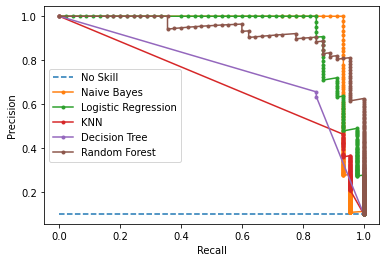

In [115]:
# plot the precision-recall curves

no_skill = len(y_test_c[y_test_c==1]) / len(y_test_c)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(NB_recall, NB_precision, marker='.', label='Naive Bayes')
pyplot.plot(LRC_recall, LRC_precision, marker='.', label='Logistic Regression')
pyplot.plot(KNN_recall, KNN_precision, marker='.', label='KNN')
pyplot.plot(DT_recall, DT_precision, marker='.', label='Decision Tree')
pyplot.plot(RF_recall, RF_precision, marker='.', label='Random Forest')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

#### Observation :- from the above graph also, we can conclude that Naive Bayes gives the best prediction result. So, we use Naive Bayes model to deploy.

## * For Subject

In [116]:
from sklearn.model_selection import train_test_split

x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_s,y,test_size=0.2,random_state=2)

#### SMOTE (Synthetic Minority Oversampling Technique)

In [117]:
pd.DataFrame(y_train_s).value_counts()

0    1626
1     192
dtype: int64

In [118]:
smote = SMOTE(sampling_strategy='minority')
x_train_s_sm, y_train_s_sm = smote.fit_resample(x_train_s,y_train_s)

In [119]:
pd.DataFrame(y_train_s_sm).value_counts()

0    1626
1    1626
dtype: int64

#### from the previous knowledge, we know that Naive Bayes algorithm perform best. So, for Subject feature we can directly use Naive Bayes approach.

In [120]:
gnb_s = GaussianNB()
mnb_s = MultinomialNB()
bnb_s = BernoulliNB()

In [121]:
gnb_s.fit(x_train_s_sm,y_train_s_sm)
y_pred_gnb_s = gnb_s.predict(x_test_s)

print(confusion_matrix(y_test_s,y_pred_gnb_s))
print(classification_report(y_test_s, y_pred_gnb_s))

[[366  44]
 [  8  37]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       410
           1       0.46      0.82      0.59        45

    accuracy                           0.89       455
   macro avg       0.72      0.86      0.76       455
weighted avg       0.93      0.89      0.90       455



In [122]:
mnb_s.fit(x_train_s_sm,y_train_s_sm)
y_pred_mnb_s = mnb_s.predict(x_test_s)

print(confusion_matrix(y_test_s,y_pred_mnb_s))
print(classification_report(y_test_s, y_pred_mnb_s))

[[299 111]
 [  3  42]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       410
           1       0.27      0.93      0.42        45

    accuracy                           0.75       455
   macro avg       0.63      0.83      0.63       455
weighted avg       0.92      0.75      0.80       455



In [124]:
bnb_s.fit(x_train_s_sm,y_train_s_sm)
y_pred_bnb_s = bnb_s.predict(x_test_s)

print(confusion_matrix(y_test_s,y_pred_bnb_s))
print(classification_report(y_test_s, y_pred_bnb_s))

[[279 131]
 [  4  41]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       410
           1       0.24      0.91      0.38        45

    accuracy                           0.70       455
   macro avg       0.61      0.80      0.59       455
weighted avg       0.91      0.70      0.76       455



Observation :- We can see that the f1 score for GaussianNB is Maximum among all NB, So we use GaussianNB for Cross_Validation

#### Cross_Validation

In [125]:
NB_grid_s = GridSearchCV(estimator = bnb_s,
                       param_grid = {},
                       cv = 10, 
                       n_jobs = -1)

NB_grid_s.fit(x_train_s_sm,y_train_s_sm)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1, param_grid={})

In [126]:
y_pred_bnb_grid_s = NB_grid_s.predict(x_test_s)

print(confusion_matrix(y_test_s,y_pred_bnb_grid_s))
print(classification_report(y_test_s, y_pred_bnb_grid_s))

[[279 131]
 [  4  41]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       410
           1       0.24      0.91      0.38        45

    accuracy                           0.70       455
   macro avg       0.61      0.80      0.59       455
weighted avg       0.91      0.70      0.76       455



#### Observation :- We can see that the precision score is vary low for subject feature. So, by just looking at the subject of the given mail, we can't predict wheather the given mail is spam or ham.